# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, OneHotEncoder 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\claud\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.columns = [x.lower().replace(" ", "_") for x in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
data = data.set_index('customer')

In [5]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [6]:
data['day'] = data['effective_to_date'].dt.day
data['week'] = data['effective_to_date'].dt.week
data['month'] = data['effective_to_date'].dt.month

In [7]:
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['week'] = pd.to_numeric(data['week'], errors='coerce')
data['month'] = pd.to_numeric(data['month'], errors='coerce')

In [8]:
data = data.drop(['effective_to_date'], axis=1)
data.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2


### 1. Get the numerical variables from our dataset.

In [10]:
numericals = data.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,week,month
customer,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,24,8,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,31,5,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,19,7,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,20,3,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,3,5,2


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [11]:
def hists(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()

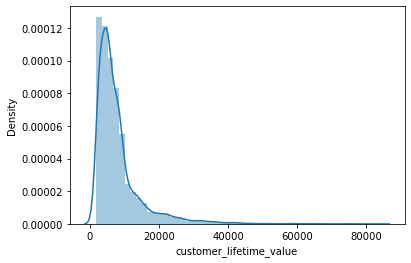

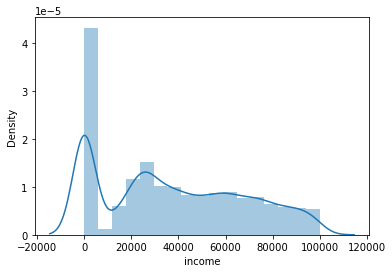

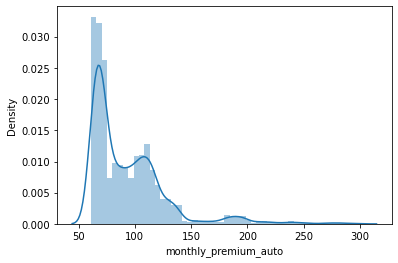

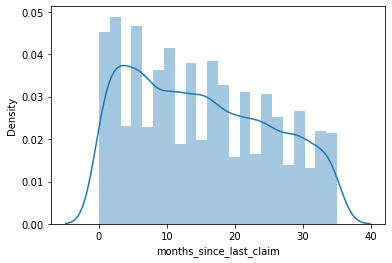

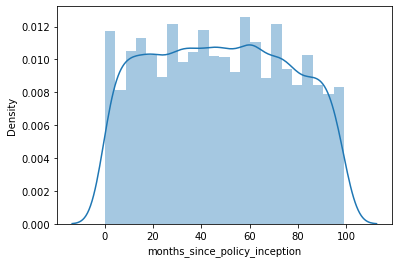

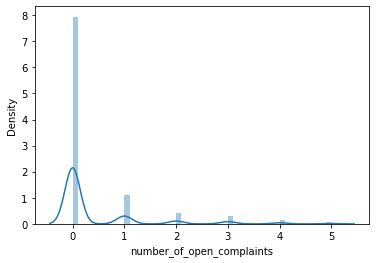

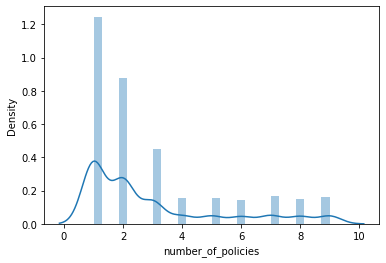

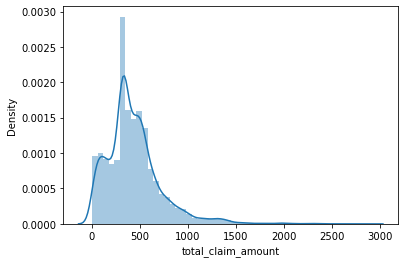

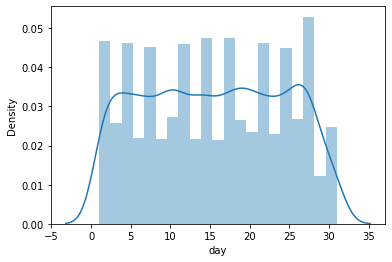

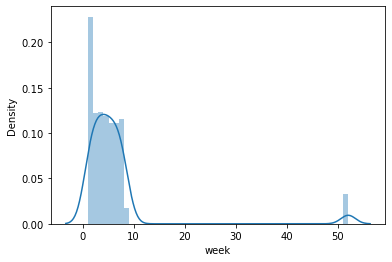

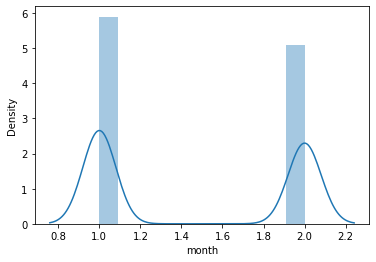

In [14]:
hists(numericals)

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

- Log tranform

In [18]:
def log_trans(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

In [19]:
numericals1 = numericals.copy()

for i in numericals.columns:
    numericals1[i] = numericals1[i].apply(log_trans)

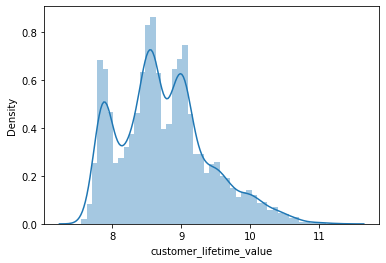

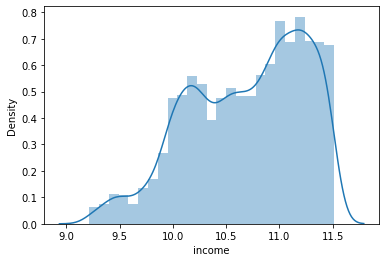

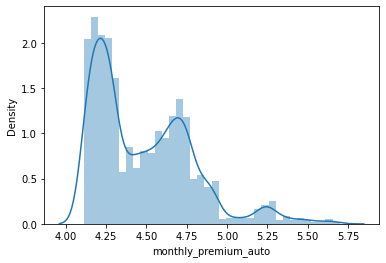

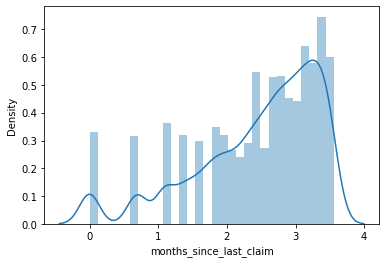

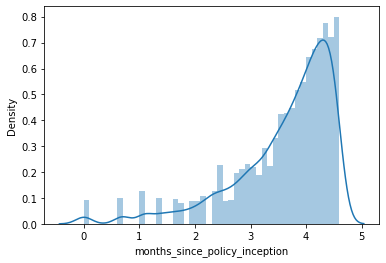

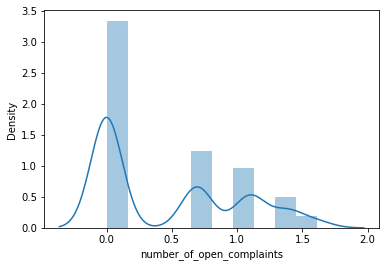

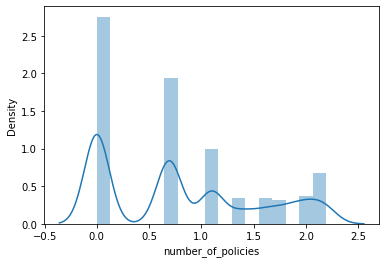

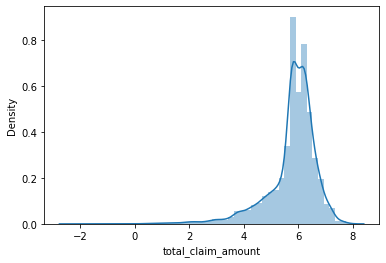

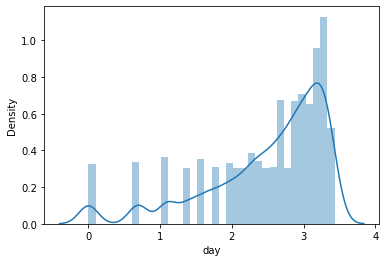

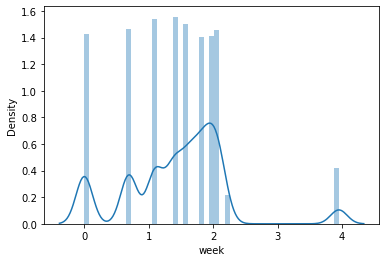

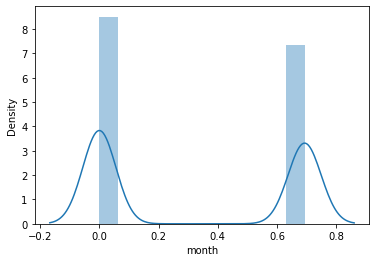

In [21]:
hists(numericals1)

- Standard Scaler

In [27]:
transformer = StandardScaler().fit(numericals)

x_standardized = transformer.transform(numericals)
x_standardized = pd.DataFrame(x_standardized, index = numericals.index)

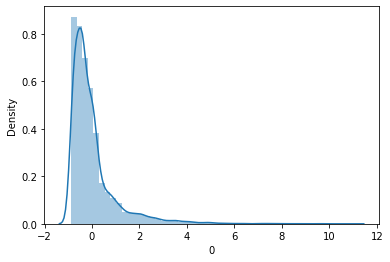

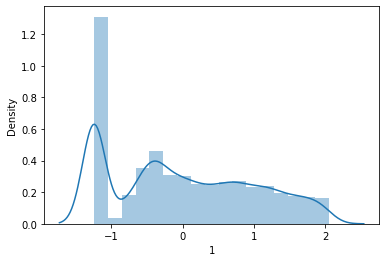

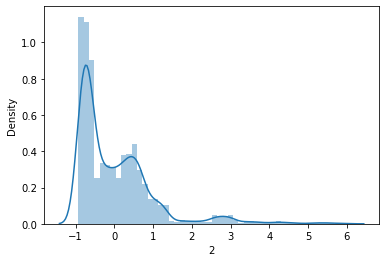

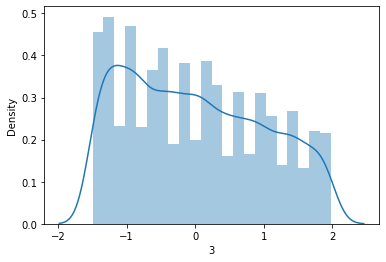

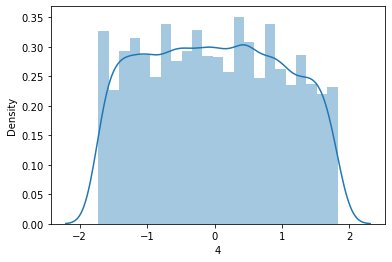

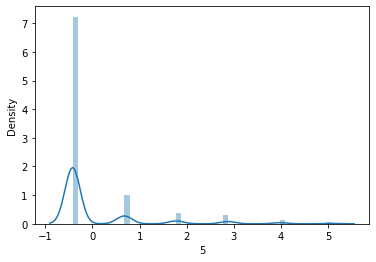

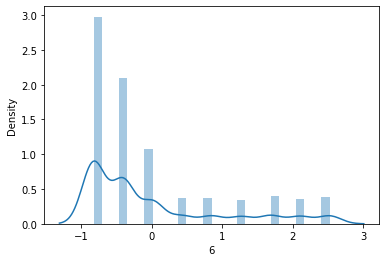

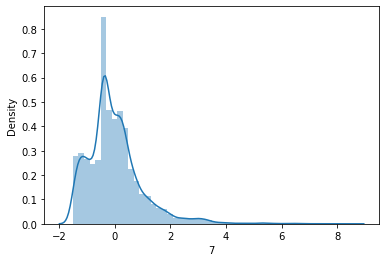

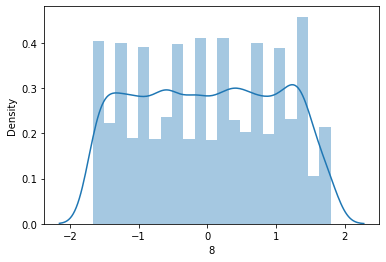

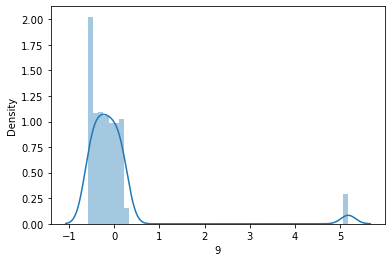

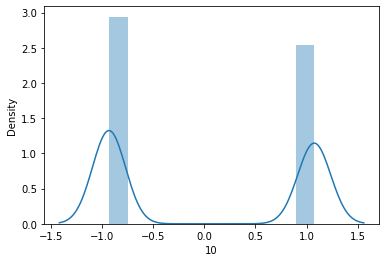

In [26]:
hists(x_standardized)

- Normalizer

In [28]:
transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)
x_normalized = pd.DataFrame(x_normalized)

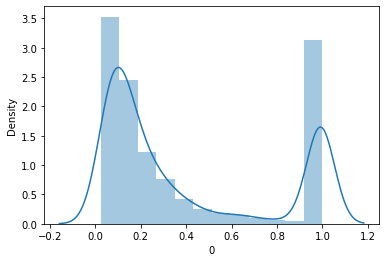

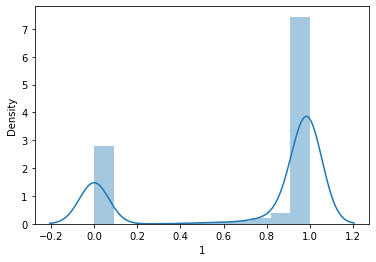

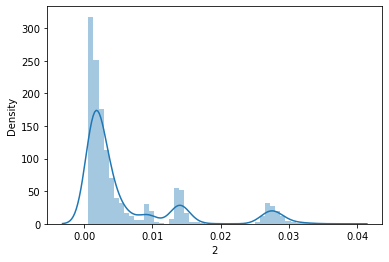

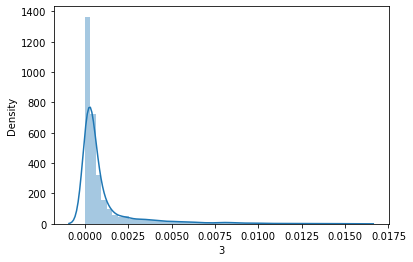

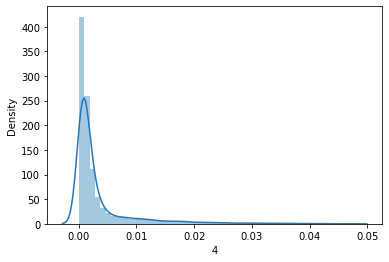

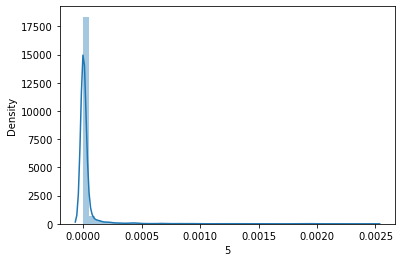

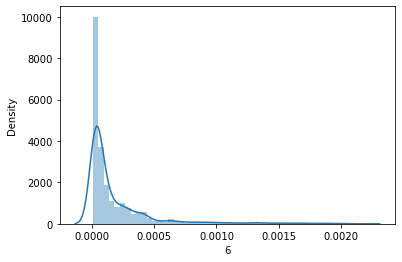

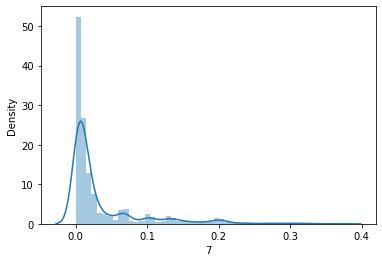

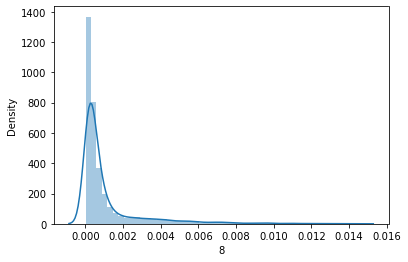

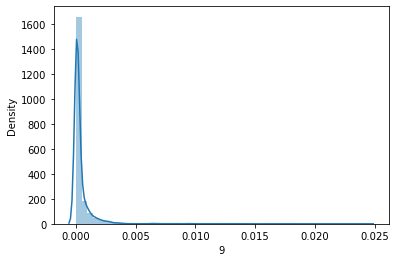

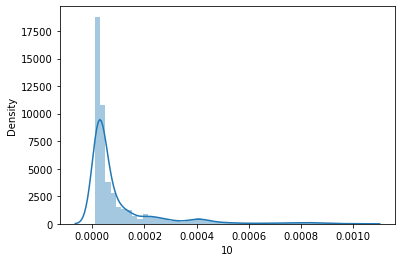

In [29]:
hists(x_normalized)

- Min-Max Scaler

In [30]:
transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max = pd.DataFrame(x_min_max)

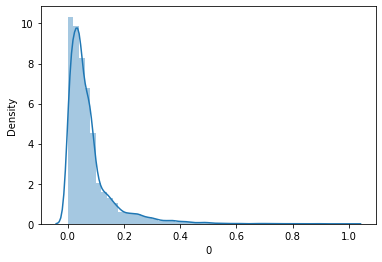

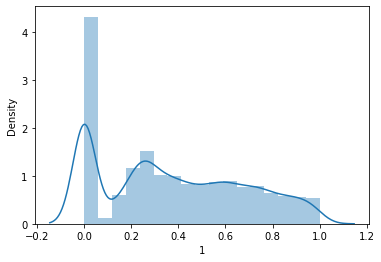

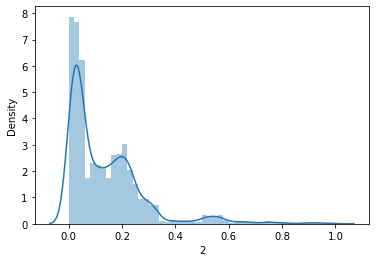

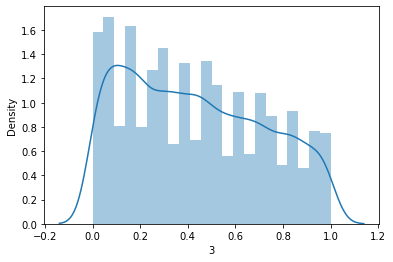

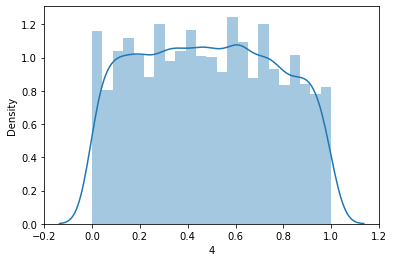

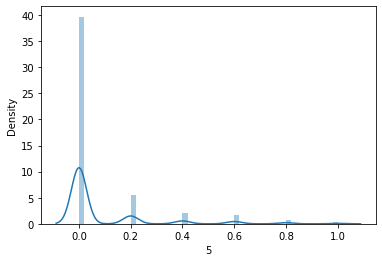

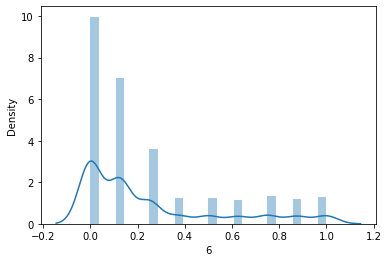

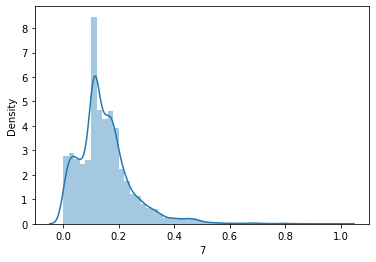

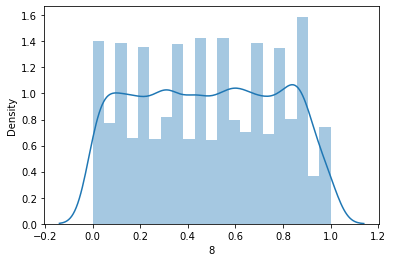

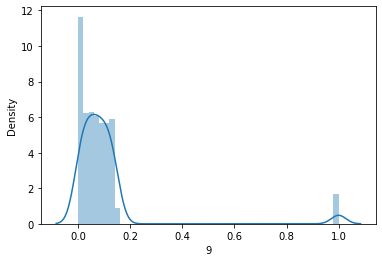

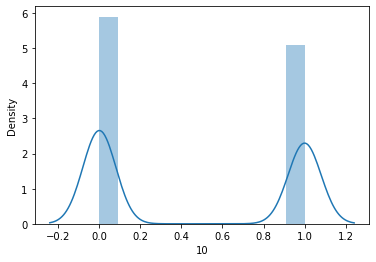

In [31]:
hists(x_min_max)